In [1]:
import numpy as np
import pandas as pd


from __future__ import print_function
import keras 
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os

import matplotlib.pyplot as plt

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tf.random.set_seed(42)

In [3]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [4]:
results = pd.DataFrame() # сводная таблица результатов
step = [] # шаг
desc = [] # описание
train_acc = [] # результат на трейне
test_acc = [] # результат на тесте

In [5]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1 
data_augmentation = True
num_predictions = 20

In [6]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


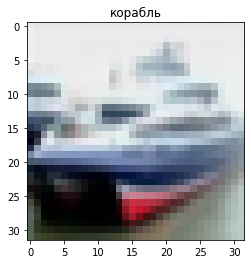

In [7]:
N = 1

plt.imshow(x_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

####  Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает.

In [8]:
# конфигурирование слоев нейросети
model_0 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_0.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_0.add(Activation('relu'))
model_0.add(Conv2D(32, (3, 3)))
model_0.add(Activation('relu'))
model_0.add(MaxPooling2D(pool_size=(2, 2)))
model_0.add(Dropout(0.25))

model_0.add(Conv2D(64, (3, 3), padding='same'))
model_0.add(Activation('relu'))
model_0.add(Conv2D(64, (3, 3)))
model_0.add(Activation('relu'))
model_0.add(MaxPooling2D(pool_size=(2, 2)))
model_0.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_0.add(Flatten())
model_0.add(Dense(512))
model_0.add(Activation('relu'))
model_0.add(Dropout(0.5))
model_0.add(Dense(num_classes))
model_0.add(Activation('softmax'))

model_0.summary()

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Не используется data augmentation')
    model_0.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model_0.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\User\AppData\Local\Temp/ipykernel_7768/3175910428.py:71: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_0.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 178s 113ms/step - loss: 1.8606 - accuracy: 0.3128 - val_loss: 1.5522 - val_accuracy: 0.4294


In [9]:
train_loss, train_m = model_0.evaluate(x_train, y_train, verbose=2)
test_loss, test_m = model_0.evaluate(x_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(0)
desc.append('Базовая модель')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 39s - loss: 1.5568 - accuracy: 0.4313 - 39s/epoch - 25ms/step
313/313 - 8s - loss: 1.5522 - accuracy: 0.4294 - 8s/epoch - 26ms/step
train_loss: 1.5568214654922485, train_accuracy: 0.4313400089740753
test_loss: 1.5522143840789795, test_accuracy: 0.4293999969959259


In [10]:
tf.keras.utils.plot_model(model_0)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


1/1 [==============================] - 0s 250ms/step


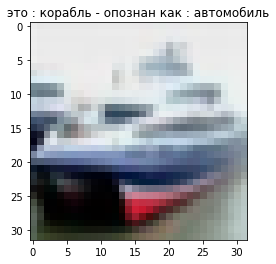

In [11]:
N = 1
y_p = model_0.predict(x_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

####  Оценим изменение точности при увеличении ширины сети (больше фильтров)

In [12]:
# конфигурирование слоев нейросети
model_1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(128, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(256, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Не используется data augmentation')
    model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model_1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                      

C:\Users\User\AppData\Local\Temp/ipykernel_7768/2845483113.py:71: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_1.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 442s 281ms/step - loss: 1.7685 - accuracy: 0.3481 - val_loss: 1.5077 - val_accuracy: 0.4650


In [13]:
train_loss, train_m = model_1.evaluate(x_train, y_train, verbose=2)
test_loss, test_m = model_1.evaluate(x_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('Больше каналов (увеличение ширины)')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 71s - loss: 1.5098 - accuracy: 0.4638 - 71s/epoch - 45ms/step
313/313 - 14s - loss: 1.5077 - accuracy: 0.4650 - 14s/epoch - 46ms/step
train_loss: 1.50975501537323, train_accuracy: 0.4638400077819824
test_loss: 1.5077465772628784, test_accuracy: 0.4650000035762787


In [14]:
tf.keras.utils.plot_model(model_1)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


1/1 [==============================] - 0s 95ms/step


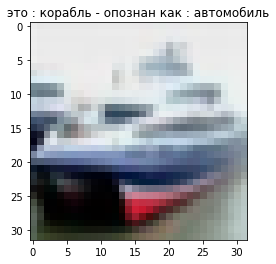

In [15]:
N = 1
y_p = model_1.predict(x_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

#### Оценить рост точности при увеличении глубины сети (больше слоев)

In [16]:
# конфигурирование слоев нейросети
model_2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Не используется data augmentation')
    model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)


    # запуск data augmentation через fit_generator
    model_2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                      

C:\Users\User\AppData\Local\Temp/ipykernel_7768/1322475058.py:72: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_2.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 317s 202ms/step - loss: 1.7757 - accuracy: 0.3505 - val_loss: 1.4422 - val_accuracy: 0.4820


In [17]:
train_loss, train_m = model_2.evaluate(x_train, y_train, verbose=2)
test_loss, test_m = model_2.evaluate(x_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(2)
desc.append('Больше слоёв (увеличение глубины)')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 72s - loss: 1.4471 - accuracy: 0.4833 - 72s/epoch - 46ms/step
313/313 - 14s - loss: 1.4422 - accuracy: 0.4820 - 14s/epoch - 46ms/step
train_loss: 1.4470771551132202, train_accuracy: 0.48330000042915344
test_loss: 1.4421530961990356, test_accuracy: 0.4819999933242798


In [18]:
tf.keras.utils.plot_model(model_2)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


1/1 [==============================] - 0s 94ms/step


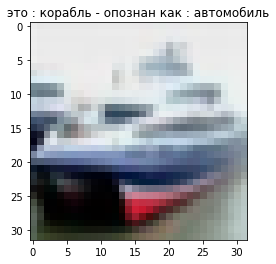

In [19]:
N = 1
y_p = model_2.predict(x_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

1/1 [==============================] - 0s 22ms/step


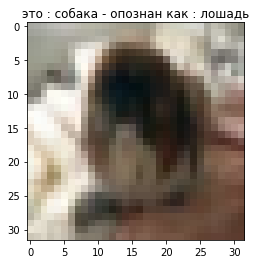

In [20]:
N = 200
y_p = model_2.predict(x_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

#### Полносвязная сеть для этой выборки

In [21]:
# конфигурирование слоев нейросети
model_3 = Sequential()

# полносвязные слои нейронной сети
model_3.add(Flatten(input_shape=x_train.shape[1:]))
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Не используется data augmentation')
    model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model_3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1573376   
                                                                 
 activation_18 (Activation)  (None, 512)               0         
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
 activation_19 (Activation)  (None, 10)                0         
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
No

C:\Users\User\AppData\Local\Temp/ipykernel_7768/114647218.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_3.fit_generator(datagen.flow(x_train, y_train,


1563/1563 [==============================] - 37s 24ms/step - loss: 2.0157 - accuracy: 0.2698 - val_loss: 1.8034 - val_accuracy: 0.3700


In [22]:
train_loss, train_m = model_3.evaluate(x_train, y_train, verbose=2)
test_loss, test_m = model_3.evaluate(x_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(3)
desc.append('Полносвязная сеть')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 5s - loss: 1.8079 - accuracy: 0.3677 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 1.8034 - accuracy: 0.3700 - 982ms/epoch - 3ms/step
train_loss: 1.8078712224960327, train_accuracy: 0.36768001317977905
test_loss: 1.8034319877624512, test_accuracy: 0.3700000047683716


In [23]:
tf.keras.utils.plot_model(model_3)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


1/1 [==============================] - 0s 92ms/step


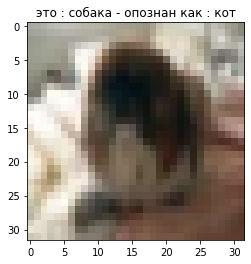

In [24]:
N = 200
y_p = model_3.predict(x_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

1/1 [==============================] - 0s 23ms/step


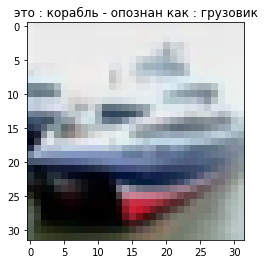

In [25]:
N = 1
y_p = model_3.predict(x_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [26]:
results['step'] = step
results['desc'] = desc
results['train_acc'] = train_acc
results['test_acc'] = test_acc

In [27]:
results

,step,desc,train_acc,test_acc
0,0,Базовая модель,0.43,0.43
1,1,Больше каналов (увеличение ширины),0.46,0.47
2,2,Больше слоёв (увеличение глубины),0.48,0.48
3,3,Полносвязная сеть,0.37,0.37


### Выводы:<br>
* увеличение количества каналов, т.е. увеличение итогового количества признаков, увеличивает значение метрики;
* увеличение глубины сети увеличивает метрику качества, немногим больше, чем с увеличением количества каналов;
* полносвязная сеть без сверточных слоев показывает качество ниже, чем базовая модель со сверточными слоями.

#### 2. Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.

Набор данных CIFAR-10 состоит из 60000 цветных изображений 32x32 в 10 классах, по 6000 изображений в каждом классе. Есть 50000 обучающих изображений и 10000 тестовых изображений.  

Набор данных MNIST аналогичен cifar10 по количеству классов. Их там тоже 10. Но размер изображений 28х28.  

Изменится batch_size = 28.  

Набор данных CIFAR-100 аналогичен CIFAR-10, за исключением того, что он содержит 100 классов, содержащих по 600 изображений в каждом. В каждом классе есть 500 обучающих изображений и 100 тестовых изображений. 100 классов в CIFAR-100 сгруппированы в 20 суперклассов. Каждое изображение имеет метку «точно» (класс, к которому оно принадлежит) и метку «грубо» (надкласс, к которому оно принадлежит).  

Изменится num_classes = 100.  

База данных Imagenet — проект по созданию и сопровождению массивной базы данных аннотированных изображений. Аннотация изображений происходит путем краудсорсинга сообществом. Из-за этого достигается большое количество размеченных данных. Особенность данного набора данных — про каждую картинку известно несколько фактов вида "в этом прямоугольнике есть автомобиль", что в совокупности с индексом по типам объектов, которые есть на изображениях, позволяет обучить алгоритм для распознавания объектов какой-то конкретной категории. 

Данная нейронная сеть окажется слишком простой и неподходящей для работы с данным датасетом.



